In [1]:
import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import curve_fit
import scipy

ledd=np.log10(1.3)+38#Eddington luminosity of Solar Mass

In [7]:

rqa=np.loadtxt('Downloads/fundamental_data/data0612radioquiet.txt')#radio quiet agn data
xrb=np.loadtxt('Downloads/fundamental_data/data0612allxrb.txt')#all xrb data
aax=np.loadtxt('Downloads/fundamental_data/data0612allagnandxrb.txt')#all data
allradioloud=np.loadtxt('Downloads/fundamental_data/data0612radioloud.txt')#all radio loud agn
rqx=np.loadtxt('Downloads/fundamental_data/data0612radioquietagnandxrb.txt')#all radio quiet agn and xrb
agn=np.loadtxt('Downloads/fundamental_data/data0612allagn.txt')

#fri=np.loadtxt('Downloads/fundamental_data/frI.txt')#all fri
#onlyradioloud=np.loadtxt('Downloads/fundamental_data/radioloud.txt')#radio loud only
#youngradiosource=np.loadtxt('Downloads/fundamental_data/youngrs.txt')#young radio source
#dong14=np.loadtxt('Downloads/fundamental_data/dong14.txt')


#data for agns and xrb
raax=aax[:,0]
xaax=aax[:,1]
maax=aax[:,2]
raaxedd=raax-ledd-maax
xaaxedd=xaax-ledd-maax


#data for radio quiet agn 
rrqa=rqa[:,0]
xrqa=rqa[:,1]
mrqa=rqa[:,2]
rrqaedd=rrqa-ledd-mrqa
xrqaedd=xrqa-ledd-mrqa


#data for agn
r=agn[:,0]
x=agn[:,1]
m=agn[:,2]
redd=r-ledd-m
xedd=x-ledd-m

#for x-ray binary
rxrb=xrb[:,0]
xxrb=xrb[:,1]
mxrb=xrb[:,2]
rxrbedd=rxrb-ledd-mxrb
xxrbedd=xxrb-ledd-mxrb

#for radio loud agn
rarl=allradioloud[:,0]
xarl=allradioloud[:,1]
marl=allradioloud[:,2]
rarledd=rarl-ledd-marl
xarledd=xarl-ledd-marl

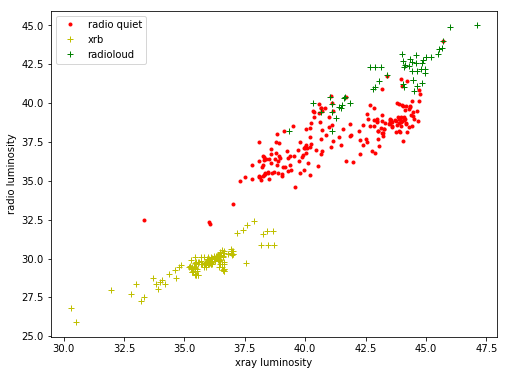

In [8]:

plt.figure(figsize=(8,6))
plt.plot(xrqa,rrqa,'r.',label='radio quiet')
plt.plot(xxrb,rxrb,'y+',label='xrb')
plt.plot(xarl,rarl,'g+',label='radioloud')

plt.ylabel('radio luminosity')
plt.xlabel('xray luminosity')
plt.legend()
plt.show()

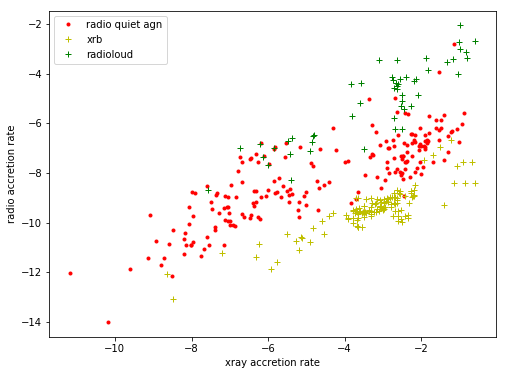

In [9]:
plt.figure(figsize=(8,6))
plt.plot(xrqaedd,rrqaedd,'r.',label='radio quiet agn')
plt.plot(xxrbedd,rxrbedd,'y+',label='xrb')
plt.plot(xarledd,rarledd,'g+',label='radioloud')

plt.ylabel('radio accretion rate')
plt.xlabel('xray accretion rate')
plt.legend()
plt.show()

In [12]:
#fix the x-ray Eddington rate
#consider R-M
def fixaccretionrate(binrange,radio,mass,xedd,binsize=0.15):
    judge=(abs(xedd-binrange)<=binsize)
    rnew=radio[judge]
    mnew=mass[judge]
    size=rnew.size
    if size >10:
        fitrm=np.polyfit(mnew,rnew,1)
        #fitrx=np.polyfit(xnew,rnew,1)
        rmR2=np.corrcoef(mnew,rnew)
        #rxR2=np.corrcoef(xnew,rnew)
        #print('num in range is  ',xnew.size) 
        print(size,binrange,fitrm[0],rmR2[0,1])
        plt.plot(mnew,rnew,'r.')
        plt.grid()
    plt.save('1.eps',dpi=400)


num,accretion_range,   R_M_coeff,  rmR2, 
12 -7.0 1.06666704441 0.780827550717


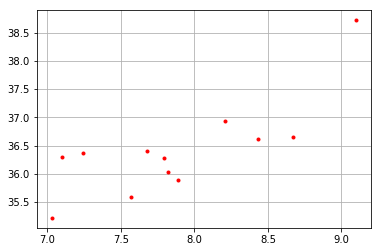

12 -6.4 1.54790061948 0.907810595


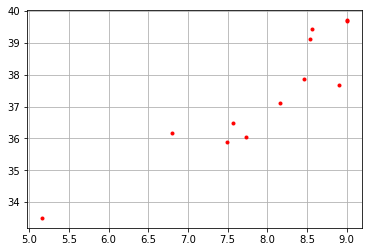

12 -5.5 1.84939996466 0.915614812119


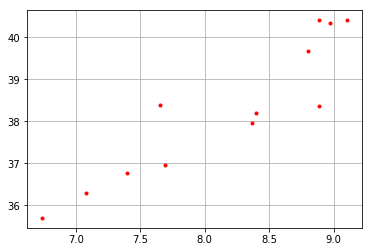

18 -2.8 1.16106953522 0.560674026082


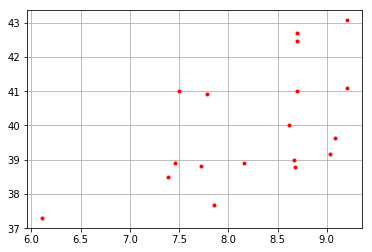

32 -2.5 1.6131915785 0.668889221123


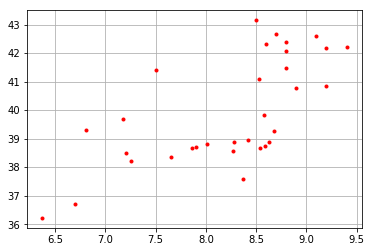

16 -2.2 1.78305197525 0.847876209204


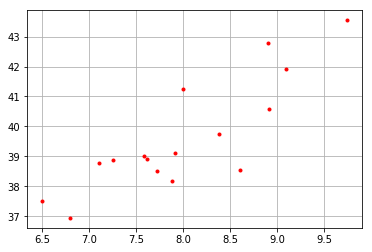

18 -1.9 1.37709766973 0.625754479169


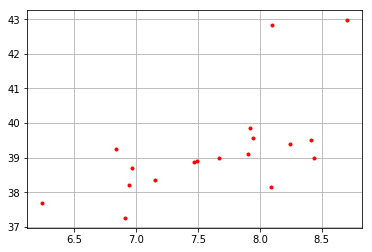

In [14]:
#all agn
#fix xray accretion rate
print('num,accretion_range,   R_M_coeff,  rmR2, ')
for i in np.arange(-10,0,0.3):
    fixaccretionrate(i,r,m,xedd,0.15)

In [26]:
import numpy as np
from astropy.modeling.models import custom_model 
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting

#sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0
# Define model
@custom_model
def sum_of_linear(x,a=0.6,b=0.6,x0=42,y0=37):
#    if x.all() < x0:
    return np.where(x<x0,a*(x-x0)+y0,b*(x-x0)+y0)
# Generate fake data
# Fit model to data



In [18]:
#fix the M in a bin
#consider R-X
def fixmass(binrange,radio,xray,mass,binsize=0.15):
    judge=(abs(mass-binrange)<=binsize)
    rnew=radio[judge]
    xnew=xray[judge]
    size=rnew.size
    if size > 10 :
        fit=np.polyfit(xnew,rnew,1)
        R2=np.corrcoef(xnew,rnew)
        if R2[0,1]>0.6:
        #print('num in range is  ',xnew.size) 
            print(size,binrange,fit[0],R2[0,1])
            plt.scatter(xnew,rnew)
    plt.show()

num,mass_range, R_X_coeff,   R2
7.0 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
           a              b              x0            y0     
    --------------- -------------- ------------- -------------
    -0.594403236923 0.716353505627 38.8471742376 35.3058536139


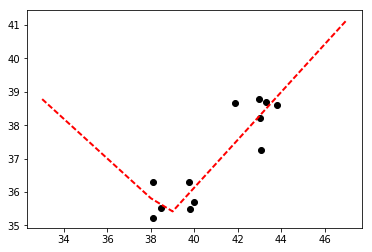

7.3 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b             x0            y0     
    -------------- ------------- ------------- -------------
    0.614965607195 3.30846101938 43.7041893026 39.1090378875


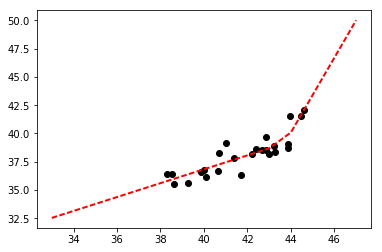

7.6 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a               b              x0            y0     
    -------------- --------------- ------------- -------------
    0.865660010507 0.0730813969037 42.6991622174 39.3977376042


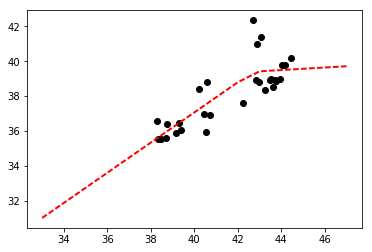

7.9 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b              x0            y0     
    -------------- -------------- ------------- -------------
    0.672496488974 0.882440236848 50.8759379953 44.0737615294


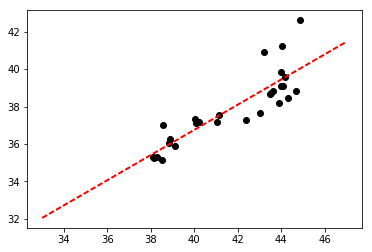

8.2 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a             b            x0           y0     
    ------------- ------------- ------------ ------------
    2.21774193548 0.68144981662 37.605161019 35.676768389


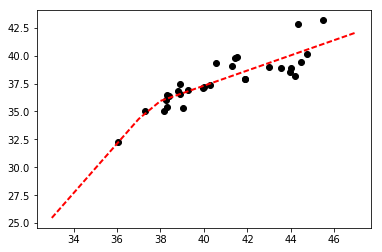

8.5 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a             b              x0           y0     
    ------------- -------------- ------------- ------------
    29.1248848449 0.682040275744 37.8270641835 36.331919365


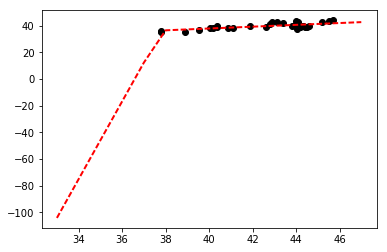

8.8 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b              x0            y0     
    -------------- -------------- ------------- -------------
    0.789474513803 0.932942975781 87.6098939647 75.6574435835


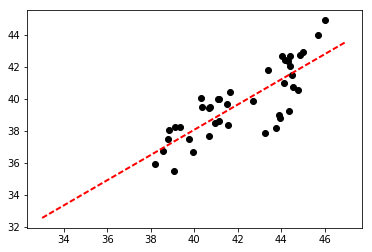

9.1 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a             b              x0            y0     
    ------------- -------------- ------------- -------------
    1.39672309045 0.371939949739 40.7390533641 39.8029133686


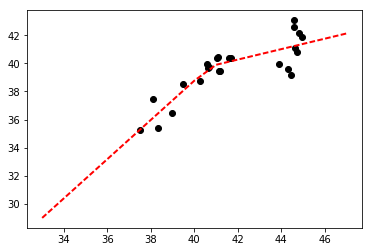

In [36]:
#fix the M in a bin
#consider R-X
def fixmass_bilinear(binrange,radio,xray,mass,binsize=0.15):
    judge=(abs(mass-binrange)<=binsize)
    rnew=radio[judge]
    xnew=xray[judge]
    xx=np.arange(33,48)
    size=rnew.size
    if size > 10 :
        m_init = sum_of_linear()
        #fit = fitting.LinearLSQFitter()
        fit=fitting.LevMarLSQFitter()
        m = fit(m_init, xnew, rnew)
        # Plot the data and the best fit
        print(binrange,m)
        plt.plot(xnew,rnew,  'o' , color= 'k' )
        plt.plot(xx, m(xx),'--', color= 'r' , lw=2)
    plt.show()
    
#fix mass for all agn
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(7,11,0.3):
    fixmass_bilinear(i,r,x,m,0.15)

num,mass_range, R_X_coeff,   R2
16 6.8 0.608700733132 0.789538347248


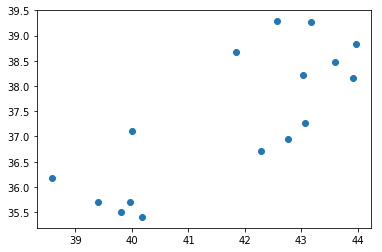

17 7.1 0.60590756889 0.874017175148


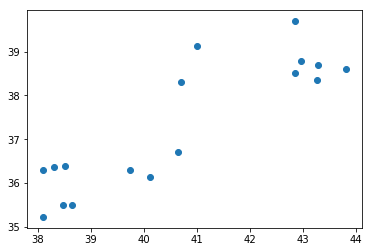

21 7.4 0.960099510182 0.835434114667


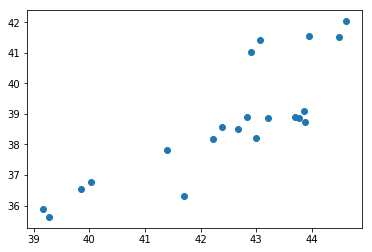

30 7.7 0.682473280282 0.837797376613


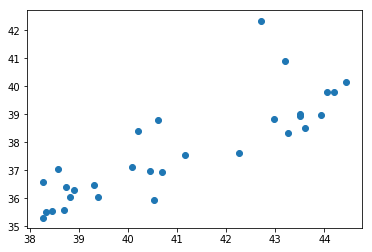

33 8.0 0.702414593473 0.837406735242


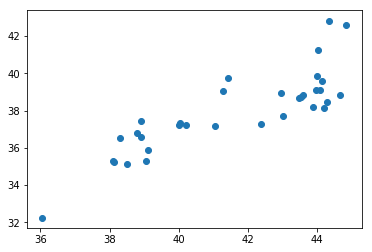

31 8.3 0.725144007887 0.86376747397


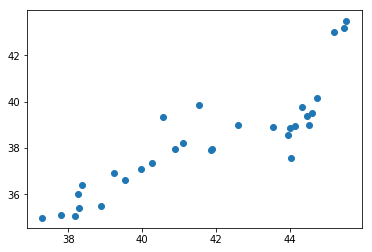

38 8.6 0.752680617032 0.729100273801


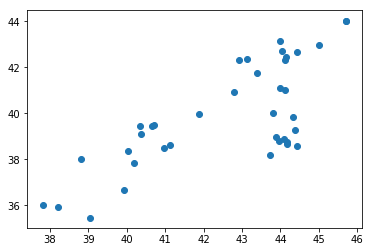

32 8.9 0.762342520682 0.834411167812


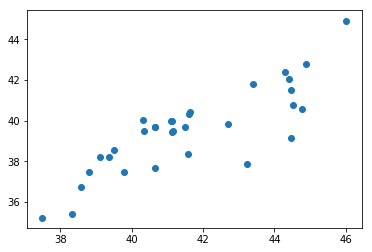

15 9.2 0.618992038974 0.819763184856


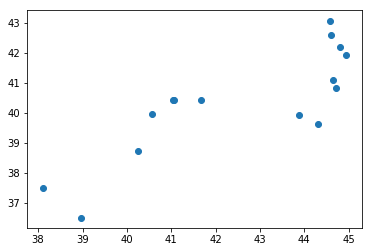

In [19]:
#fix mass for all agn
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(5,10,0.3):
    fixmass(i,r,x,m,0.15)

num,mass_range, R_X_coeff,   R2
7.0 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
           a              b              x0            y0     
    --------------- -------------- ------------- -------------
    -0.594403236923 0.716353505627 38.8471742376 35.3058536139


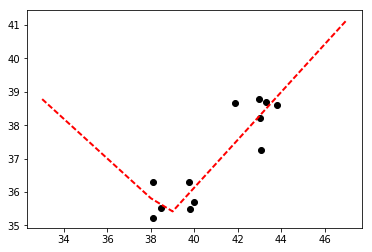

7.3 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b             x0            y0     
    -------------- ------------- ------------- -------------
    0.673889993556 0.92427389908 68.7743925987 56.2088530656


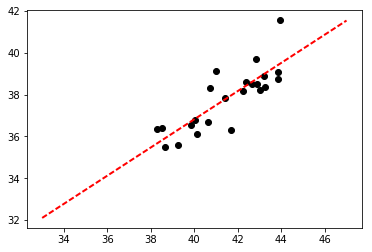

7.6 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b              x0            y0     
    -------------- -------------- ------------- -------------
    0.555995646883 0.615658712115 26.5071121165 28.5347963429


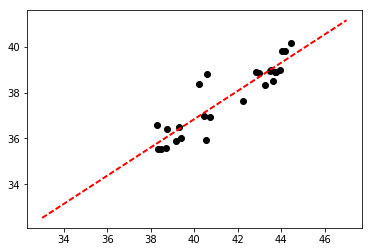

7.9 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b              x0            y0     
    -------------- -------------- ------------- -------------
    0.650632436122 0.111213694872 43.2001487811 38.8682040495


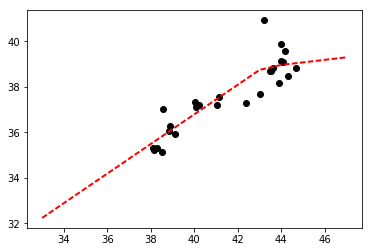

8.2 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a             b             x0           y0     
    ------------- -------------- ----------- -------------
    1.35984423211 0.366349736621 39.42449247 37.3275689711


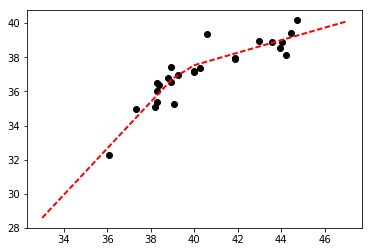

8.5 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a             b              x0            y0     
    ------------- -------------- ------------- -------------
    0.90393473954 -1.71558543696 43.3984818549 40.7028024652


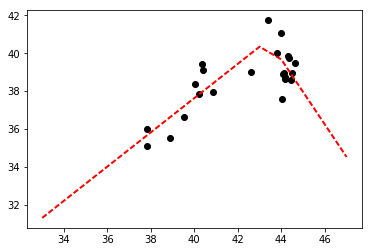

8.8 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b             x0            y0     
    -------------- ------------- ------------- -------------
    0.365613988148 3.72043010753 44.4596891723 39.4155102539


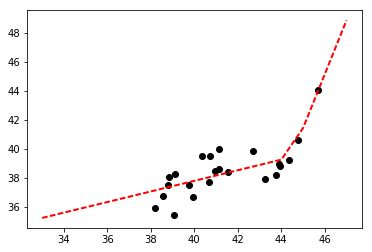

9.1 Model: sum_of_linear
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
          a              b               x0            y0     
    ------------- ---------------- ------------- -------------
    1.39672309044 -0.0463823360396 40.9406691043 40.0845147282


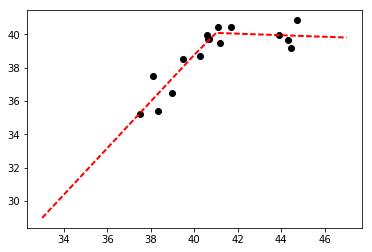

In [37]:
#fix mass for radio quiet agn
print('num,mass_range, R_X_coeff,   R2')
    for i in np.arange(7.0,11.0,0.3):
    fixmass_bilinear(i,rrqa,xrqa,mrqa,0.15)

num,mass_range, R_X_coeff,   R2
16 6.8 0.608700733132 0.789538347248


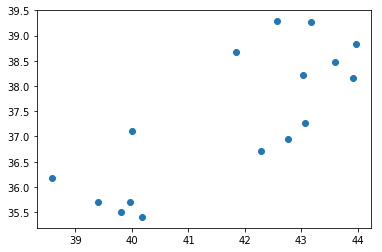

17 7.1 0.60590756889 0.874017175148


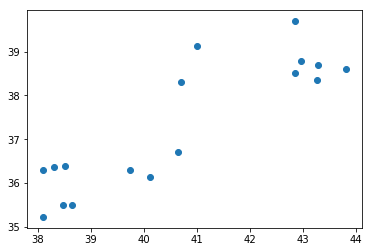

17 7.4 0.773487662117 0.876549146283


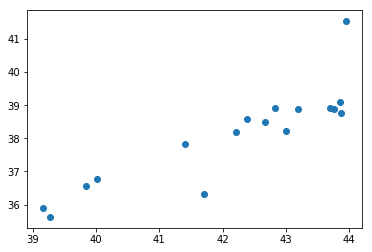

29 7.7 0.638366547706 0.889386337457


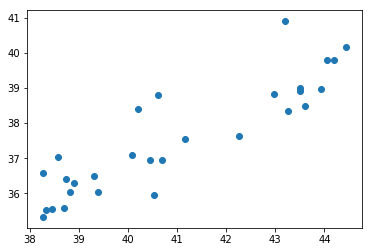

28 8.0 0.584498332825 0.8977471865


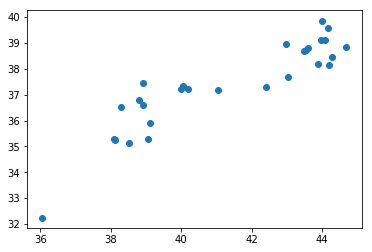

26 8.3 0.562220402966 0.907696836209


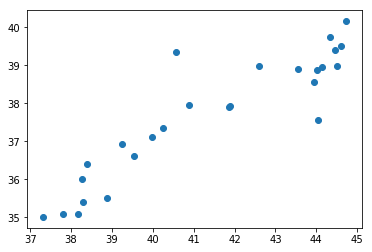

25 8.6 0.534599915561 0.69772063644


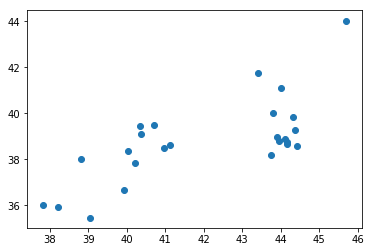

18 8.9 0.525465538074 0.702871605401


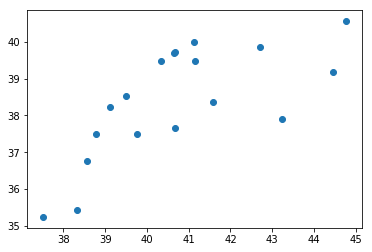

In [20]:
#fix mass for radio quiet agn
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(7.0,11.0,0.3):
    fixmass(i,rrqa,xrqa,mrqa,0.15)